In [1]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.transform import resize

import matplotlib.pyplot as plt
from glob import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
def visualize(images, samples_per_row=4, title=False):
    sample_rows = len(images) // samples_per_row
    fig, m_axs = plt.subplots(sample_rows, samples_per_row, figsize = (20, 6*sample_rows))
    [c_ax.axis('off') for c_ax in m_axs.flatten()]
    for ax, image in zip(m_axs.flatten(), images):
        img = imread(image)
        ax.imshow(img, cmap='gray')

def visualize_single(image, gray=True):
    if isinstance(image, str):
        print ("Reading from string")
        image = imread(image)
        
    plt.figure(figsize=(20, 10))
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)


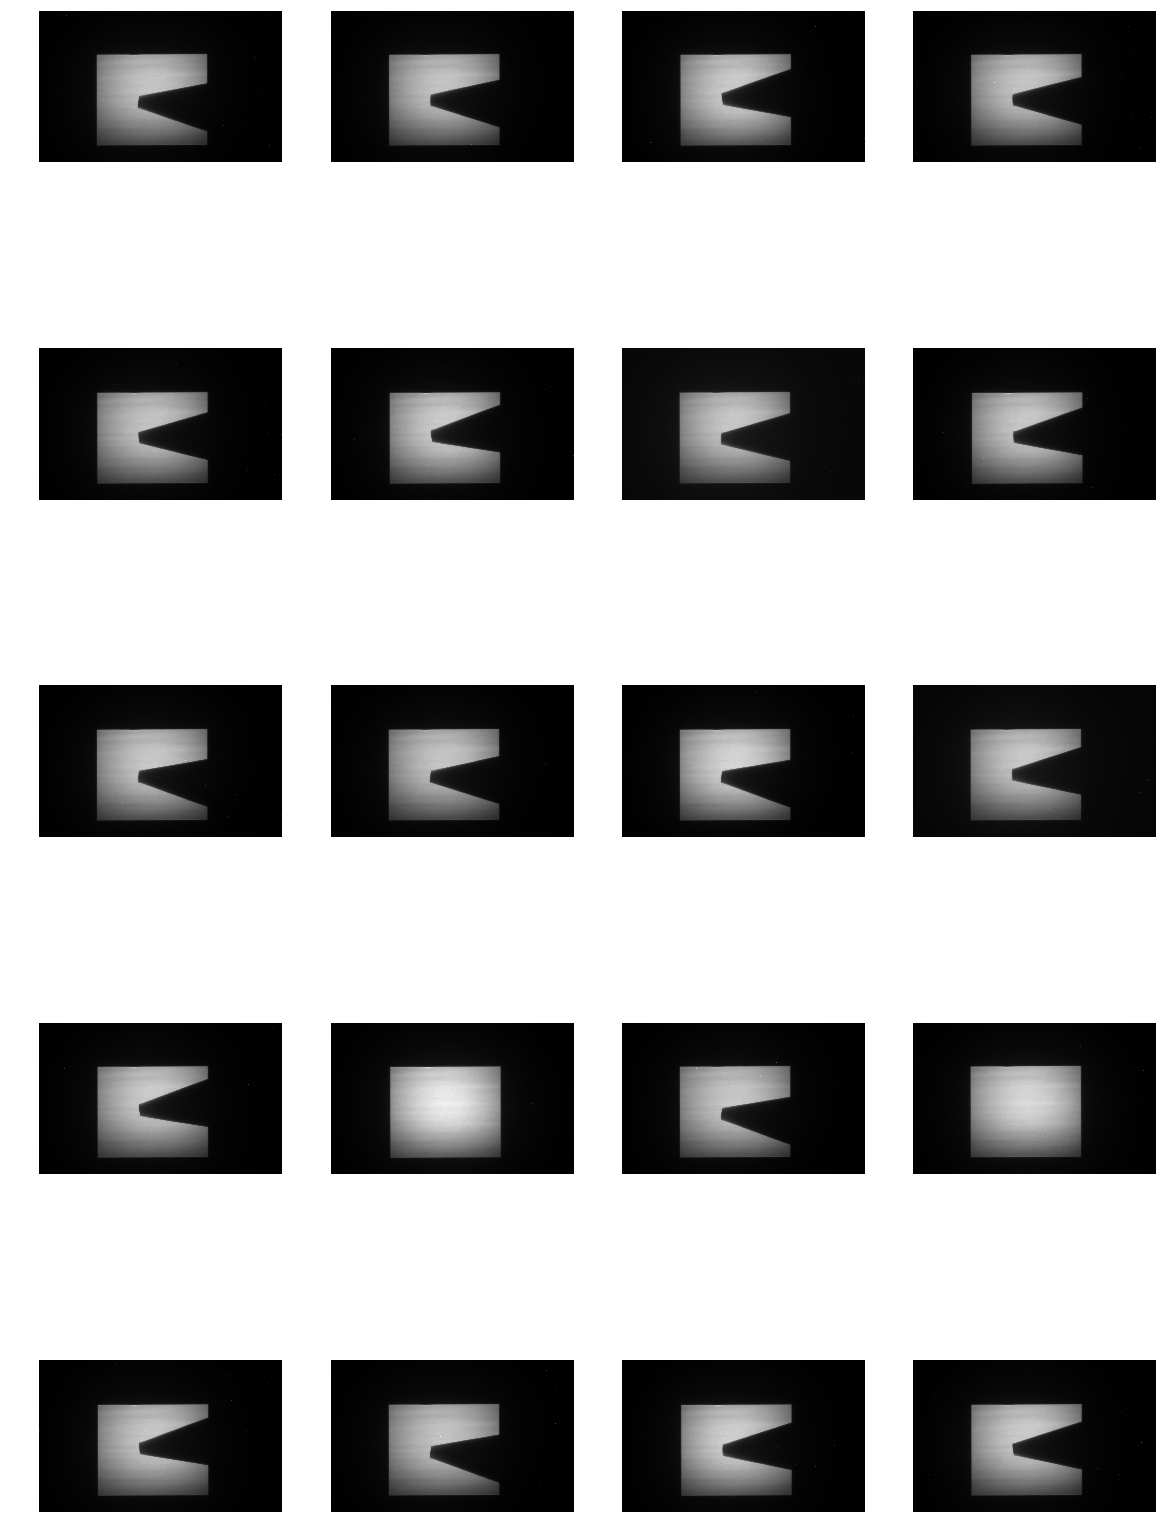

In [3]:
images = glob('./data/pin_tomo/*.tif')
visualize(images)

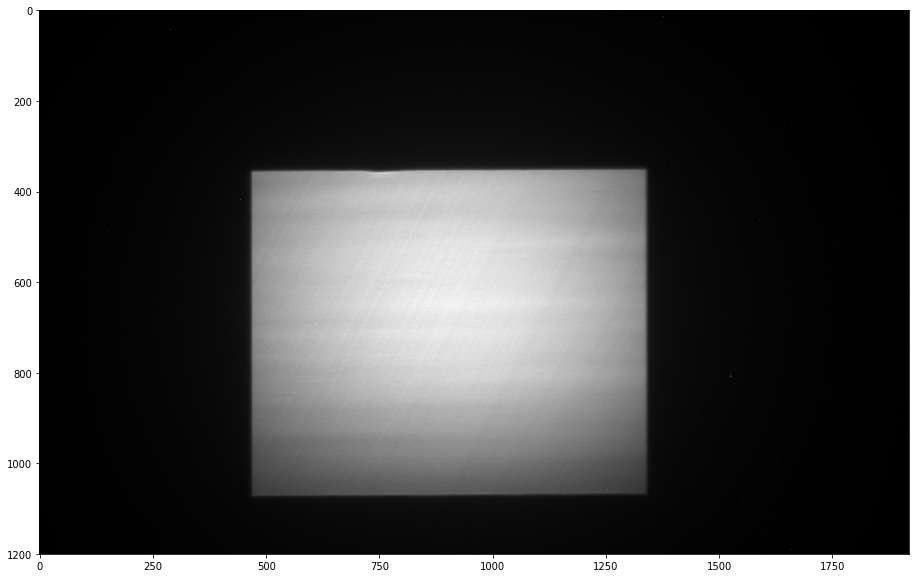

In [62]:
image = imread(images[13])
visualize_single(image)

In [63]:
image_n = (image - np.min(image) ) / np.max(image)
image_, original = np.copy(image_n), np.copy(image_n)


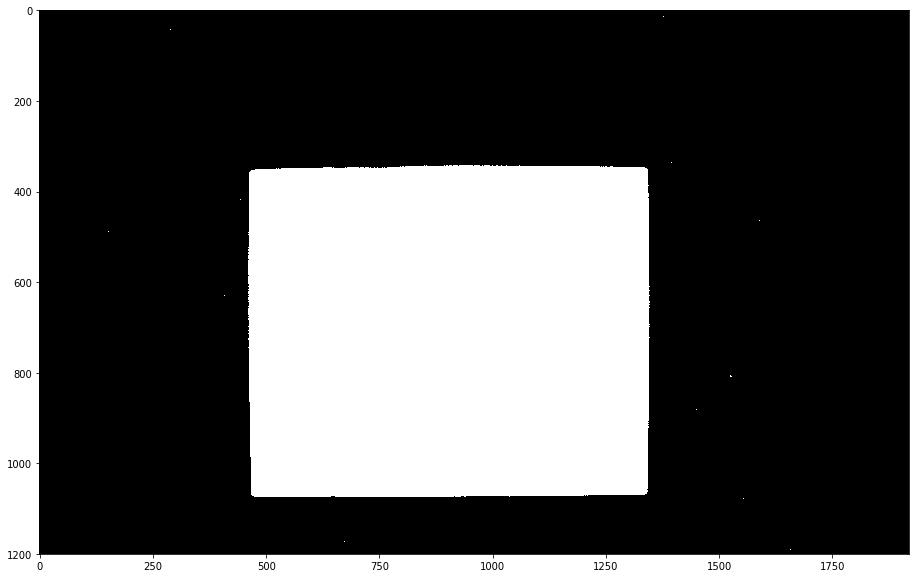

In [64]:
binary = np.zeros_like(image_)
binary[image_ > 0.1] = 1      
binary = np.uint8(binary)

edges = cv2.Canny(binary, 0.1, 0.1, apertureSize = 3)

visualize_single(binary)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


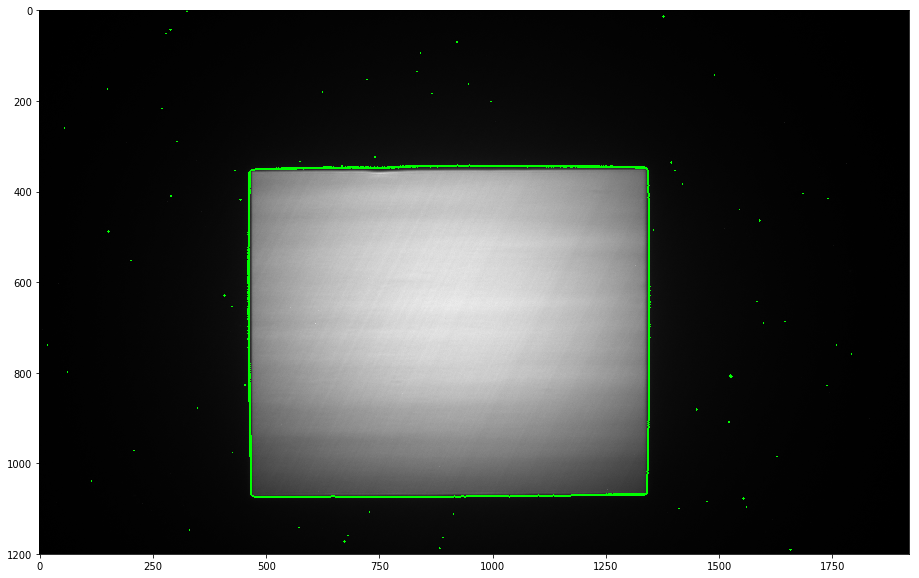

In [65]:
im2, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = np.dstack((original.copy(), original.copy(), original.copy()))
print (countours.length)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
visualize_single(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


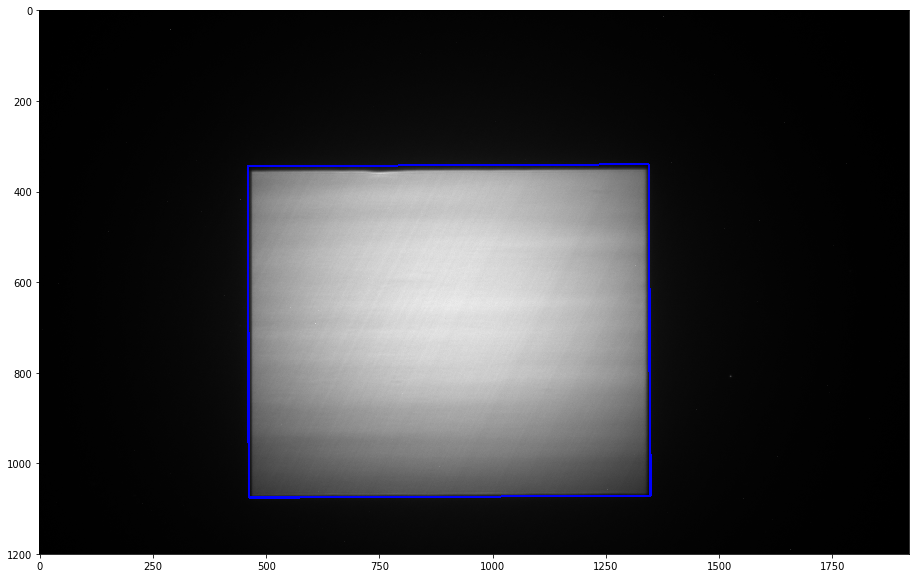

In [66]:
cnt = [ cnt.shape[0] for cnt in contours]
cnt = contours[np.argmax(cnt)]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

img2 = np.dstack((original.copy(), original.copy(), original.copy()))

cv2.drawContours(img2,[box], 0, (0,0,255), 3)
visualize_single(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


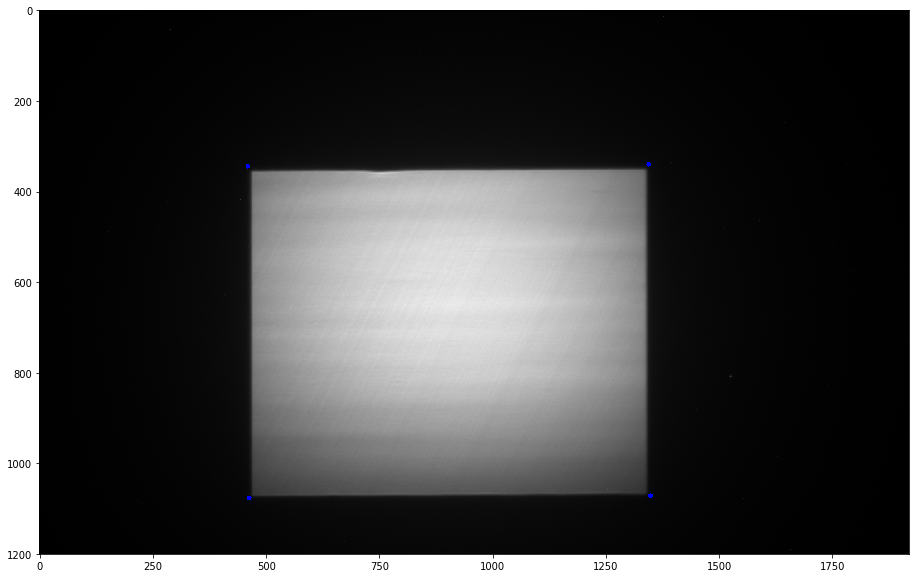

In [67]:
result = np.dstack((original.copy(), original.copy(), original.copy()))

for pt in box:
    cv2.circle(result, (pt[0], pt[1]), 5, (0,0,255), -1)

visualize_single(result, False)